## PyTorch Workflow
let's explore an example PyTorch end to end workflow

In [1]:
what_were_covering ={1: "data (prepare and load)",
                     2: "build model",
                     3: "fitting the model to data(training)",
                     4: "making prediction and evaluation",
                     5: "saving and loading the model",
                     6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making prediction and evaluation',
 5: 'saving and loading the model',
 6: 'putting it all together'}

* And now let's import what we'll need for this module.

* We're going to get torch, `torch.nn` (nn stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and `matplotlib`.

In [2]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural network
import matplotlib.pyplot as plt

In [3]:
# Chcek Python Version
torch.__version__

'1.13.0+cu116'

## 1. Data (Preparing and Loading)

I want to stress that "data" in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data!)
* Audio files like songs or podcasts
* DNA
* Text 


Machine learning is a game of two parts:

1. Turn your data, whatever it is, into numbers (a representation).
2. Pick or build a model to learn the representation as best as possible.
Sometimes one and two can be done at the same time.

To showcase this let's create some *known* data using the linear regression formula.

We will use a linear regression formula to make a straight line with *known* **parameters **

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
# Check shape
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: torch.Size([50, 1])
Shape of y: torch.Size([50, 1])


In [6]:
len(X), len(y)

(50, 50)

Beautiful! Now we're going to move towards building a model that can learn the relationship between **X (features)** and **y (labels)**.

## @ Split data into training and test sets

Let's create a training and test set with our data

In [7]:
# Create train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Wonderful, we've got 40 samples for training (`X_train & y_train`) and 10 samples for testing (`X_test & y_test`).

The model we create is going to try and learn the relationship between `X_train & y_train` and then we will evaluate what it learns on` X_test and y_test`.

How might we better vizualize our data?
This is where the data explorer's motto comes in!
"vizualize" "vizualize" "vizualize"

* Let's create a function to visualize it.

In [8]:
# Let's create a function to visualize it.
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot train data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the prediction if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

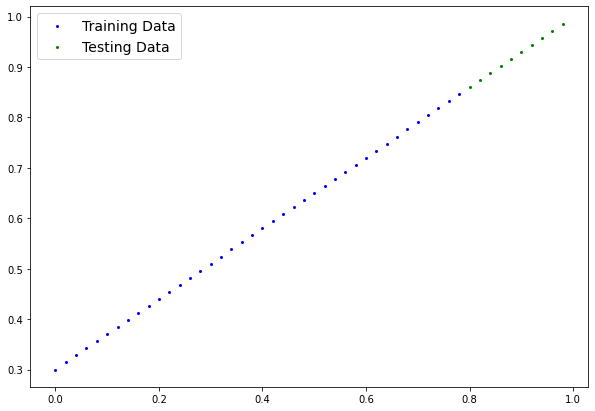

In [9]:
# Run the function for our data
plot_predictions()

## 2. Build model

Now we've got some data, let's build a model to use the blue dots to predict the green dots.

We're going to jump right in.

We'll write the code first and then explain everything.

Let's replicate a standard linear regression model using pure PyTorch.

### Video content
Let's create our first PyTorch model

This is very exciting---------

### What our model does:
1. Start with random values (weights & bias)
2. Look at training data and adjust the random values to better represent ( or get closer to) the ideal values (The weights and bias values we used to create the data)

### How does it do so?
#### Through two main algorithms:
1. Gradient descent >> https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation  >> https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [10]:
from torch import nn

# Create Linear regression model class
class LinearRegressionModel(nn.Module): # Here, nn.Modules that has almost everything PyTorch inherhits
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # Can this parameter be updated vai gradient descent?
                                            dtype = torch.float)) # PyTorch loves the data dyte torch.float32
    
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
    
  # Forward method to define the computation in the model
  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)

    return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

## PyTorch model building essentials
 PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

* They are `torch.nn`, `torch.optim`, `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`. For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

1. `torch.nn:`	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
2. `torch.nn.Parameter`: Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
3. `torch.nn.Module`:	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.
4. `torch.optim`:	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
5. `def forward()`:	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

### Checking the contents of our PyTorch model
* Now we have created a model. Let's see what's inside....
* We can check out our model parameters or what's inside our model using wait for it `.parameters()`

In [11]:
# Let's create a random seed
torch.manual_seed(42)

# Let's create an instance of the model (this is the subclass of nn.Module)
model_0 = LinearRegressionModel()

# Now check out the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# Let's print parameters values with name
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
# Our known weight and Bisa
weight, bias

(0.7, 0.3)

* **So our main goal is to create model that update our `random weight and bisa` as close as our `known weight and bias`**

## Making prediction using `torch.inference_mode()`
* To check our model's prediction power let's see how well it predict `y_test` based on `x_test`
* When we pass data through our model it is going to run it through the `forward()` method

In [14]:
# First let's print X_test and y_test
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [15]:
# We can make prediction directly
y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [16]:
# Or we can also make predictions using torch.inference_model()
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(). However, torch.inference_mode() in preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [17]:
# Print original y_test values
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

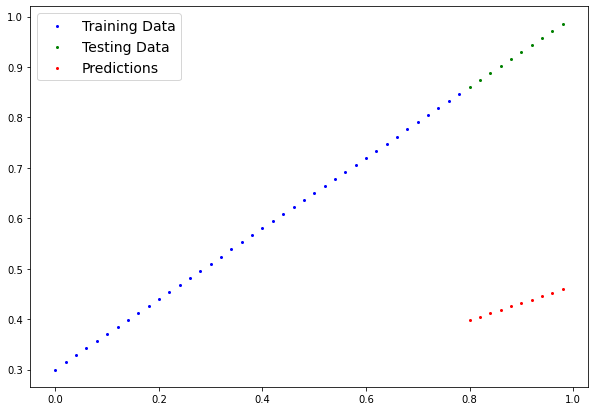

In [18]:
# Plot prediction
plot_predictions(predictions=y_preds)

## 3. Train model

Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to parameters as patterns), the **weights** and **bias** values we set randomly using `nn.Parameter()` and `torch.randn()` to be something that better represents the data.

We could hard code this (since we know the default values `weight=0.7 and bias=0.3)` but where's the fun in that?

Much of the time you won't know what the ideal parameters are for a model.

Instead, it's much more fun to write code to see if the model can try and figure them out itself.

Creating a loss function and optimizer in PyTorch
For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a `loss function` as well as an `optimizer`.

### Video content transcript
* The whole idea of training is for a model to move from some `unknown` parameters To some `known` parameters.
* Or in the other words from a poor representation of the data to a better representation of the data.
* One way to measure how poor or how wrong your models prediction are is to use a loss function
* Los function may aslo be called cost function or criterion in different areas. For our case we are going to refer to it as a loss fuction.

**Things we need to train our Model**

### Loss Function:
* A function to meausre how your models prediction are to ideal outputs, lower is better.

### Optimizer:
* Takes into account the loss of model and adjust the model's parameters (e.g. `weights & bias`) to improve our loss function

### Specifically for PyTorch, we need:
* A training loop
* A testing loop

In [19]:
# Let's check our model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
# Or we can check by this process also
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### **Loss Function:**
However, there are some common values, that are known to work well such as the SGD (**stochastic gradient descent**) or **Adam optimizer**. And the **MAE (mean absolute error)** loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, let's use MAE (which is under `torch.nn.L1Loss())` in PyTorch as our loss function.

* Mean absolute error (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

In [21]:
# Setup a loss function
loss_fn = nn.L1Loss()

###**Optimizer:**
And we'll use SGD, `torch.optim.SGD(params, lr)` where:

1. **params** - is the target model parameters you'd like to optimize (e.g. the **weights and bias** values we randomly set before). For example of our case `params=model_0.parameters()`

2. **lr** - is the learning rate you'd like the optimizer to update the parameters at, **higher means the optimizer will try larger updates** (these can sometimes be too large and the optimizer will fail to work), **lower means the optimizer will try smaller updates** (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a **hyperparameter** (because it's set by a machine learning engineer or by us).

* Common starting values for the **learning rate are 0.01, 0.001, 0.0001**, however, these can also be adjusted over time (this is called learning rate scheduling).

-> Woah, that's a lot, let's see it in code.

In [22]:
# Setup optimizer(SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)    # Here lr=learning rate = Possibly the most important learning hyperparameter we can set.

## Q. Which loss fucntion and optimizer should we use?
A: This will be problem specific.But with experince, we will get an idea of what works what doesn't with our particular problem set.

For example, for a regression (Like this case) a loss function nn.L1Loss() and an optimizer `torch.optim.SDG()` will suffice.

But for classification problem like classifying whether dog or can we will like to use a loss function `nn.BCELoss()` (Binary cross entropy loss)

## Building a Traning Loop and Testing Loop in PyTorch

**A couple of things we need in  atraining loop:**
0. Loop through the data
1. Forward pass (This involves data moving through our model's 'forward()'functions - **also called forward propagation**.
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward - moves backward through the network to calculate the gradients of each parameters of our model with respect to the loss. (**Backpropagation**)
5. Optimizer step - use the optimizer to adjust the model's parameters to try and improve the loss. (**Gradient Descent**)

#### @ **Training**:

In [23]:
# Takes random seeds
torch.manual_seed(42)

# An epoch is one loop through the data-----------(Tgis is hyperparameter because we have set it by ourself)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# Step 0. Loop through the data

for epoch in range(epochs):
  # Set the model to training mode. So PyTorch models have a couple of different modes.
  model_0.train() #So train mode in PyTorch sets all parameters.That require gradients to require gradients.

  # Step 1. Forward pass
  y_pred = model_0(X_train)

  # Step 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)  # Here y_pred is prediction values and y_train is the actual or Ideal values 
  print(f"Loss: {loss}")

  # Step 3. Optimizer zero grad
  optimizer.zero_grad()

  # Step 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # Step 5 the optimizer(Perform gradient descent)
  optimizer.step()

#---------------------argentina cs bradil-----------------------------------------------------------------------------------------#

  ### Testing
  # When we are testing, we are just evaluating the parameters, the patterns that our model has learned
  model_0.eval()  # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)

  with torch.inference_mode():  # Turn off the gradient tracking. Faster performance
  #with torch.no_grad(): # You may also see torch.no_grad() in older PyTorch code

    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Clculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out whats's happen
  if epoch % 10 ==0:

    # Append all values into the empty list
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Train_Loss: {loss} | Test_Loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Train_Loss: 0.31288138031959534 | Test_Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Train_Loss: 0.1976713240146637 | Test_Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Train_Loss: 0.08908725529909134 | Test_Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.0822758

In [24]:
# First check the list data
loss_values, test_loss_values

([tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.08

### Let's convert the list values that we have got as tensor into the numpy array for ploting

In [25]:
# Tensor to numpy array
import numpy as np

# np.array(torch.tensor(loss_values).cpu().numpy()), np.array(torch.tensor(test_loss_values).cpu().numpy())

# We can also dedlete .cpu()
np.array(torch.tensor(loss_values).numpy()), np.array(torch.tensor(test_loss_values).numpy())

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 array([0.48106518, 0.3463552 , 0.2172966 , 0.14464018, 0.11360953,
        0.09919948, 0.08886633, 0.08059376, 0.07232123, 0.06473556,
        0.05646304, 0.0481905 , 0.04060482, 0.03233228, 0.02405975,
        0.01647409, 0.00820156, 0.00502309, 0.00502309, 0.00502309],
       dtype=float32))

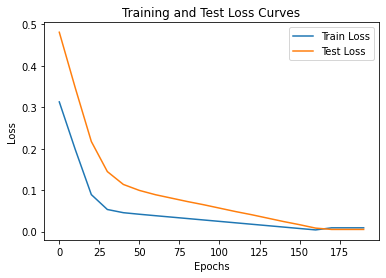

In [26]:
# Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [27]:
# Makes some predictions
with torch.inference_mode():
  y_preds_new = model_0(X_test)

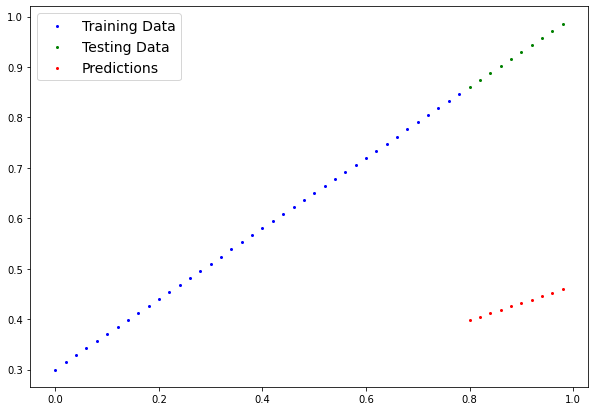

In [28]:
# Plot previous prediction
plot_predictions(predictions=y_preds)

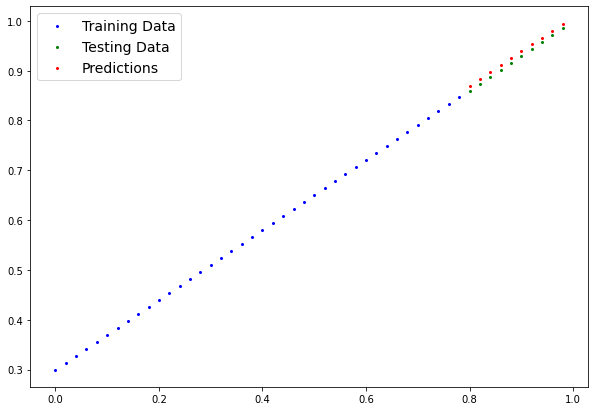

In [29]:
# Plot Predictions after 100 epochs
plot_predictions(predictions=y_preds_new)

In [30]:
# Check original weight & Bias
weight, bias

(0.7, 0.3)

In [31]:
# After training model's parameters updated
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

## @ Saving and loading a PyTorch model

If you've trained a PyTorch model, chances are you'll want to save it and export it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it.

Or maybe you'd like to save your progress on a model and come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

### -> Saving Models and Loading
There are three main method you should about for saving and loading models in PyTorch

1. `pytorch.save()` - It allows us to save the PyTorch model in python's **pickle** format
2. `pytorch.load()` - It allows us to load a saved PyTorch model
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [32]:
# Saving our PyTorch model
from pathlib import Path     # This is Python's module for dealing with writing file paths.

# 1. Create model's directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

PosixPath('Models/01_pytorch_workflow_model_0.pth')

In [33]:
# Now save the model using state_dict()
print(f"Saving Model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving Model to : Models/01_pytorch_workflow_model_0.pth


## -> Loading a PyTorch Model
Since we have saved our model's state_dict() rather than entire model we will create a new instance of our model class and load the saved `state_dict()` into that.


In [34]:
# Let's check first what actually model's state_dict()
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [35]:
# To load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

In [36]:
# Let's check new instance parameters
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

It's just initiate new random parameters

In [37]:
# Load the saved state_dict() of model_0 (this will update the new instance with new updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [38]:
# Now check new parameters
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [39]:
# Let's make some prediction with our loaded model
# For prediction let's turns our model in the evaluation mode first
loaded_model_0.eval()

# Use Inference mode for prediction
with torch.inference_mode():
  loaded_model_pred = loaded_model_0(X_test)

# Check the predicted values
loaded_model_pred, loaded_model_pred.type()

(tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]]), 'torch.FloatTensor')

In [40]:
# Convert tensor to numpy array
loaded_model_pred.detach().numpy()

array([[0.86853516],
       [0.8825158 ],
       [0.8964964 ],
       [0.9104769 ],
       [0.92445755],
       [0.9384382 ],
       [0.9524188 ],
       [0.96639943],
       [0.98038006],
       [0.9943607 ]], dtype=float32)

In [41]:
# Let's pred again with our original model and then compare with loaded model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [42]:
# Let's compare loaded model preds with original model preds
y_preds == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

So we can see that our original model and saved loaded model gives same predictions. Tha's realy good!

## @ Now Putting it all together
let's go back through the steps above and see it all in one place

In [43]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Let's check the PyTorch version
torch.__version__

'1.13.0+cu116'

##### Create device-agnostic code
* This means if we have got access to a GPU, our code will use it. (for potentially faster computing)
* If no GPU is available then the code will default to using CPU

In [44]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### Step-1: Data

In [45]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias

# Print some sample X and y values
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [46]:
# Split Data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_train), len(X_test), len(y_test)

(40, 40, 10, 10)

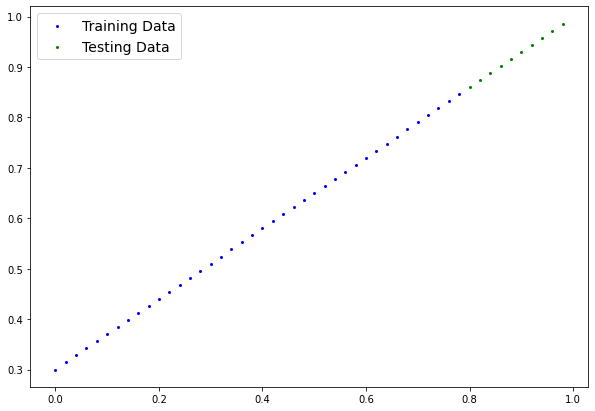

In [47]:
# Plot the data
# we will use our previous plot_predictions() function
plot_predictions(X_train, y_train, X_test, y_test)

### Step-2: Build PyTorch Model(Linear model for our data)

In [48]:
# Create linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters. It also called linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)  # Because in our dummy data we have one output for one input
    
  def forward(self, x: torch.Tensor) ->torch.Tensor: # Called Pythons tie pins. It means x should be a tensor and retunr also tensor
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

# Create model object
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [49]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [50]:
# Let set the model to use the target device
model_1.to(device)

# Now check again new device
next(model_1.parameters()).device

device(type='cpu')

### Step-3: Training
For training we need
* **Loss Function**: To measure how wrong our model is
* **Optimizer**: It optimize our model parameters (In here, `weight and bias`)
* **Training Loop**
* **Testing Loop**

In [51]:
# Setup loss function
loss_fn = nn.L1Loss() # Same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.01) # Smaller learning rate 0.0001 will be small step, and 0.1 will be larger step


In [52]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (Device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad by default the optimize is going to accumulate gradients behind the scenes. So every epoch we want to reduce those back to zero.
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing Loop
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")




Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.01380180753767

How can we evaluate our model?

In [53]:
# Our original model's parameters
weight, bias

(0.7, 0.3)

In [54]:
# Chcek updated model's parameters after training
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### Step-4: Making and Evaluating Prediction

In [ ]:
# Turn the model in evaluation mode
model_1.eval()

In [56]:
# Make prediction on test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

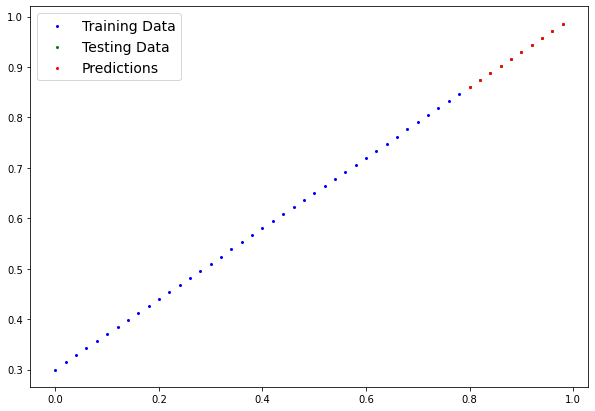

In [58]:
# vCheck ou our model prediction visually
# If we run on GPU the we have to plot y_preds in cpu mode. In this case we have to add .cpu() end of the y_preds
#plot_predictions(predictions=y_preds.cpu())

plot_predictions(predictions=y_preds)

### Step-5: Saving and Loading our train mdoel

In [61]:
# import file path
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Save the model state dict
print(f"Saving the mode to: {MODEL_SAVE_PATH}")

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the mode to: Models/01_pytorch_workflow_model_1.pth


In [62]:
# Load a PyTorch model
# Let's create a new instance where we will load our trained model's parameters
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
# The reason being is because we're doing all of our computing with device agnostic code.
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [63]:
# Let's check new loaded model's device
next(loaded_model_1.parameters()).device

device(type='cpu')

In [64]:
# Let's chack loaded model's parameters
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [66]:
# Now let's evalute the loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

loaded_model_1_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

In [67]:
# Let's compare train model and loaded models
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## @ Let's Create Function for Train Loop and Testing Loop

In [70]:
# Train Function
def train_step(model, loss_fn, optimizer, features_data, labels):

  # Trun on train mode
  model.train()
  # 1. Forward pass
  y_pred = model(features_data)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, labels)

  # 3. Zero optimizer gradients
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Perform gradients descent
  optimizer.step()

  return loss

In [71]:
# Test Function
def test_step(model, loss_fn, features_data, labels):

  # Turn on evaluation mode
  model.eval()

  # Setup inference mode contex manager
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model(features_data)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, labels)

    return test_loss

### Let's train and testion our model using our own train and testing function

In [79]:
torch.manual_seed(42)

epochs = 200

for epoch in range (epochs):
  # Train our model
  train_step(model_1, loss_fn, optimizer, X_train, y_train)

  # Testing our model
  test_step(model_1, loss_fn, X_test, y_test)

  # Print output
  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 20 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 40 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 60 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 80 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 100 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 120 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 140 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 160 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 180 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184


In [80]:
  print(f"Average Train Loss: {loss.mean()}")
  print(f"Average Test Loss: {test_loss.mean()}")

Average Train Loss: 0.010256484150886536
Average Test Loss: 0.0003308236482553184
